<a href="https://colab.research.google.com/github/timetoshine17/Beginner-for-Python/blob/main/SN/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display

In [4]:
import os
url = "https://raw.githubusercontent.com/hsnam95/class2022Spring/main/aeiou.wav"
os.system("curl " + url + " > aeiou.wav")

s, sr = librosa.load('aeiou.wav')

#s는 오디오 신호, sr은 샘플링 주파수(22050hz 이 기준)

In [5]:
s = librosa.util.normalize(s) #오디오 데이터를 정규화함. 신호의 최대 절대값이 1.0이 되더록 함. -> 일정한 볼륨
librosa.display.waveplot(s, sr) #x축 : 시간, y축 진폭.
ipd.Audio(s[7000:12000], rate=sr) #7000-12000샘플을 추출하자. 특정부분만 재생가능

AttributeError: module 'librosa.display' has no attribute 'waveplot'

(0.0, 5000.0)

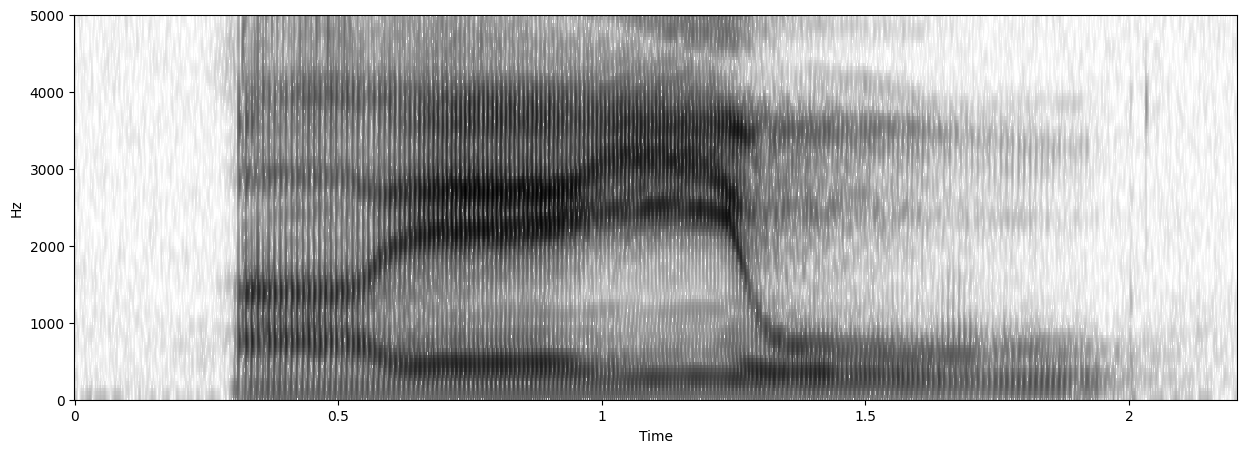

In [6]:
s_preemp = librosa.effects.preemphasis(s) #고주파 대역을 증폭

n_fft=512
hop_length=int(0.001*sr)
win_length=int(sr*0.008)

spec = librosa.stft(s_preemp, n_fft=n_fft, hop_length=hop_length, win_length=win_length, window = 'hann') #오디오 신호에 대해 STFT(Short-Time Fourier Transform)를 계산
magspec = np.abs(spec)
dBspec = librosa.amplitude_to_db(magspec, ref=np.max)

plt.figure(figsize=(15, 5))
librosa.display.specshow(dBspec, sr=sr, x_coords = np.linspace(1, len(s), dBspec.shape[1])/sr , x_axis='time', y_axis='linear', cmap='Greys')
plt.ylim((0,5000))

In [7]:
from scipy.signal import lfilter
sig = s[7000:12000]
sig = lfilter(np.array([1]), np.array([1]), sig, axis=0)
librosa.display.waveplot(sig, sr)
ipd.Audio(sig, rate=sr)

AttributeError: module 'librosa.display' has no attribute 'waveplot'

In [8]:
rms = librosa.feature.rms(s)
plt.plot(rms[0])

TypeError: rms() takes 0 positional arguments but 1 was given

In [9]:
F0, voiced_flag, voiced_prob = librosa.pyin(s, 60, 200)
plt.plot(F0, '.')

TypeError: pyin() takes 1 positional argument but 3 were given

위의 코드들이 이전 버전 librosa를 사용하기에 잘 작동하지 않음. matplotlib을 사용해야함